# TITANIC SURVIVAL CHALLENGE

#### This project is binary classification problem, where the passenger either survived (1) or died (0). Here is a list of the columns of the dataset:
* <b>PassengerID</b> - Unique ID for each column
* <b>Survived</b> - Whether the passenger survived (1) or not (0)
* <b>Pclass</b> - Class of the passenger's ticket. Either 1, 2 or 3.
* <b>Sex</b> - Passenger's sex (male or female)
* <b>Age</b> - Passenger's age
* <b>Sibsp</b> - Number of sibling or spouses aboard the Titanic
* <b>Parch</b> - Number of parents or children aboard the Titanic
* <b>Ticket</b> - Passenger's ticket number
* <b>Fare</b> - The price paid for the passenger's ticket
* <b>Cabin</b> - Passenger's cabin number
* <b>Embarked</b> - Port where the passenger embarked. Can be:
* <b>C</b> - Cherbourg
* <b>Q</b> - Queenstown
* <b>S</b> - Southampton

#### Although we know exactly who survived the Titanic, the project is still useful to apply important concepts in data science and machine learning. So here it is!
* <b>Objective:</b> Predict which passenger survived the Titanic (Jack died)



### Techniques Used:
* Pandas, Numpy
* Matplotlib, Seaborn
* Heatmap
* Skicit-learn
* Model Selection
* Logistic Regression, KNN, Decision Trees, Random Forest, Naive Bayes, SVM
* Feature Engineering
* Feature Elimination
* Data Cleaning

## Importing Data and Libraries

In [292]:
# Import libraries for pre-processing and data visualization
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [293]:
# Import the dataset
data = pd.read_csv("titanic.csv")

## Exploratory Data Analysis

In [294]:
# Printing data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [295]:
# Columns in dataset
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [296]:
# Print number of rows and columns
data.shape

(891, 12)

In [297]:
# Print information about various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [299]:
# Statistics of the columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature Engineering

### 1. Pclass

In [300]:
# Grouping of columns
print(data[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


### 2. Sex

In [302]:
print(data[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


### 3. SibSp

In [303]:
print(data[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean())

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


### 4. Parch

In [304]:
print(data[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean())

   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000


### 5. Embarked

In [305]:
print(data[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


## Data Visualization

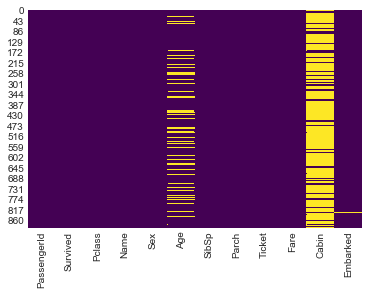

In [306]:
# Checking the null values in different columns
sns.heatmap(data=data.isnull(),cbar=False, cmap="viridis")

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

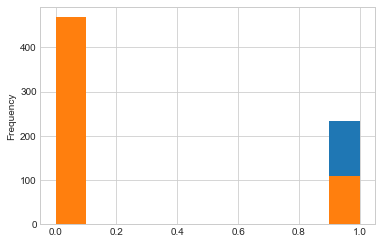

In [307]:
data["Survived"].groupby(data["Sex"]).plot(kind="hist")

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

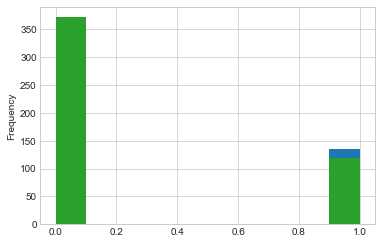

In [308]:
data["Survived"].groupby(data["Pclass"]).plot(kind="hist")

Parch
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

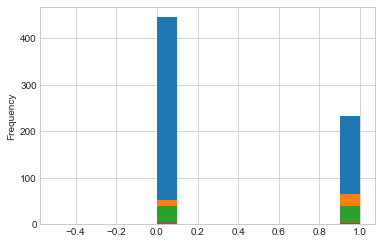

In [309]:
data["Survived"].groupby(data["Parch"]).plot(kind="hist")

SibSp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
5    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

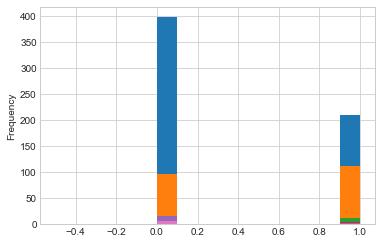

In [310]:
data["Survived"].groupby(data["SibSp"]).plot(kind="hist")

Embarked
C    AxesSubplot(0.125,0.125;0.775x0.755)
Q    AxesSubplot(0.125,0.125;0.775x0.755)
S    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Survived, dtype: object

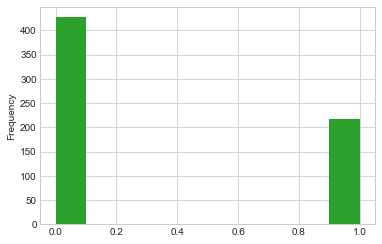

In [311]:
data["Survived"].groupby(data["Embarked"]).plot(kind="hist")

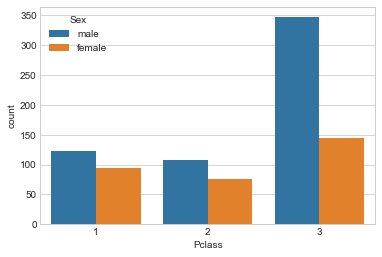

In [312]:
sns.countplot("Pclass", data=data, hue="Sex")

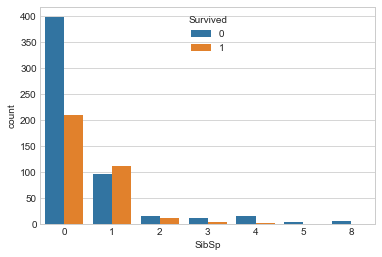

In [313]:
sns.countplot("SibSp", data=data, hue='Survived')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A81251BA8>]],
      dtype=object)

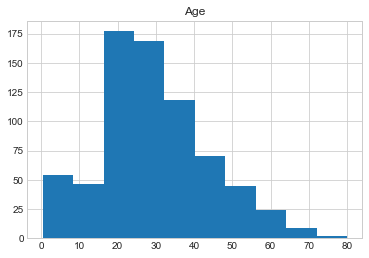

In [314]:
data.hist("Age")

## Data Cleaning

In [315]:
# Drop column "Cabin"
data.drop(["Cabin"], inplace=True, axis=1)

In [316]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [317]:
# Drop column "Embarked"
data.drop(["Embarked"], inplace=True, axis=1)

In [318]:
# Handling Missing Values
data.Age.fillna(np.mean(data.Age), inplace=True)

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


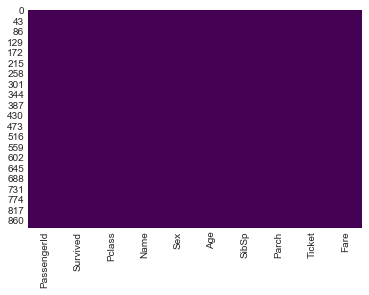

In [320]:
# Checking again missing or null values
sns.heatmap(data=data.isnull(),cbar=False, cmap="viridis")

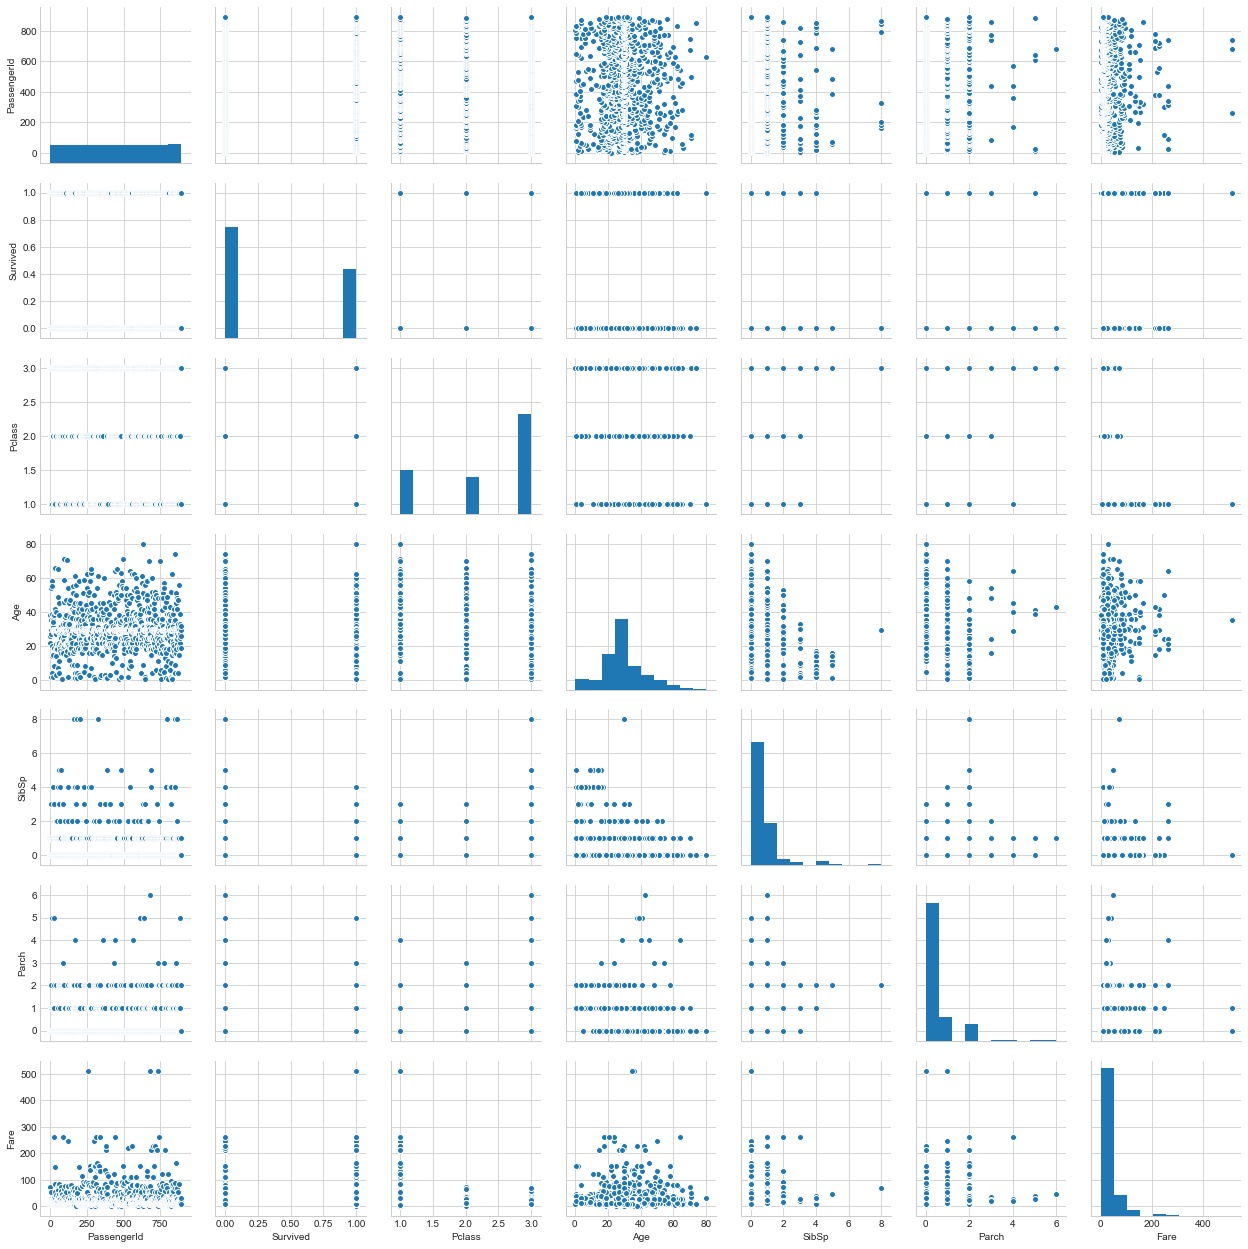

In [323]:
sns.pairplot(data)

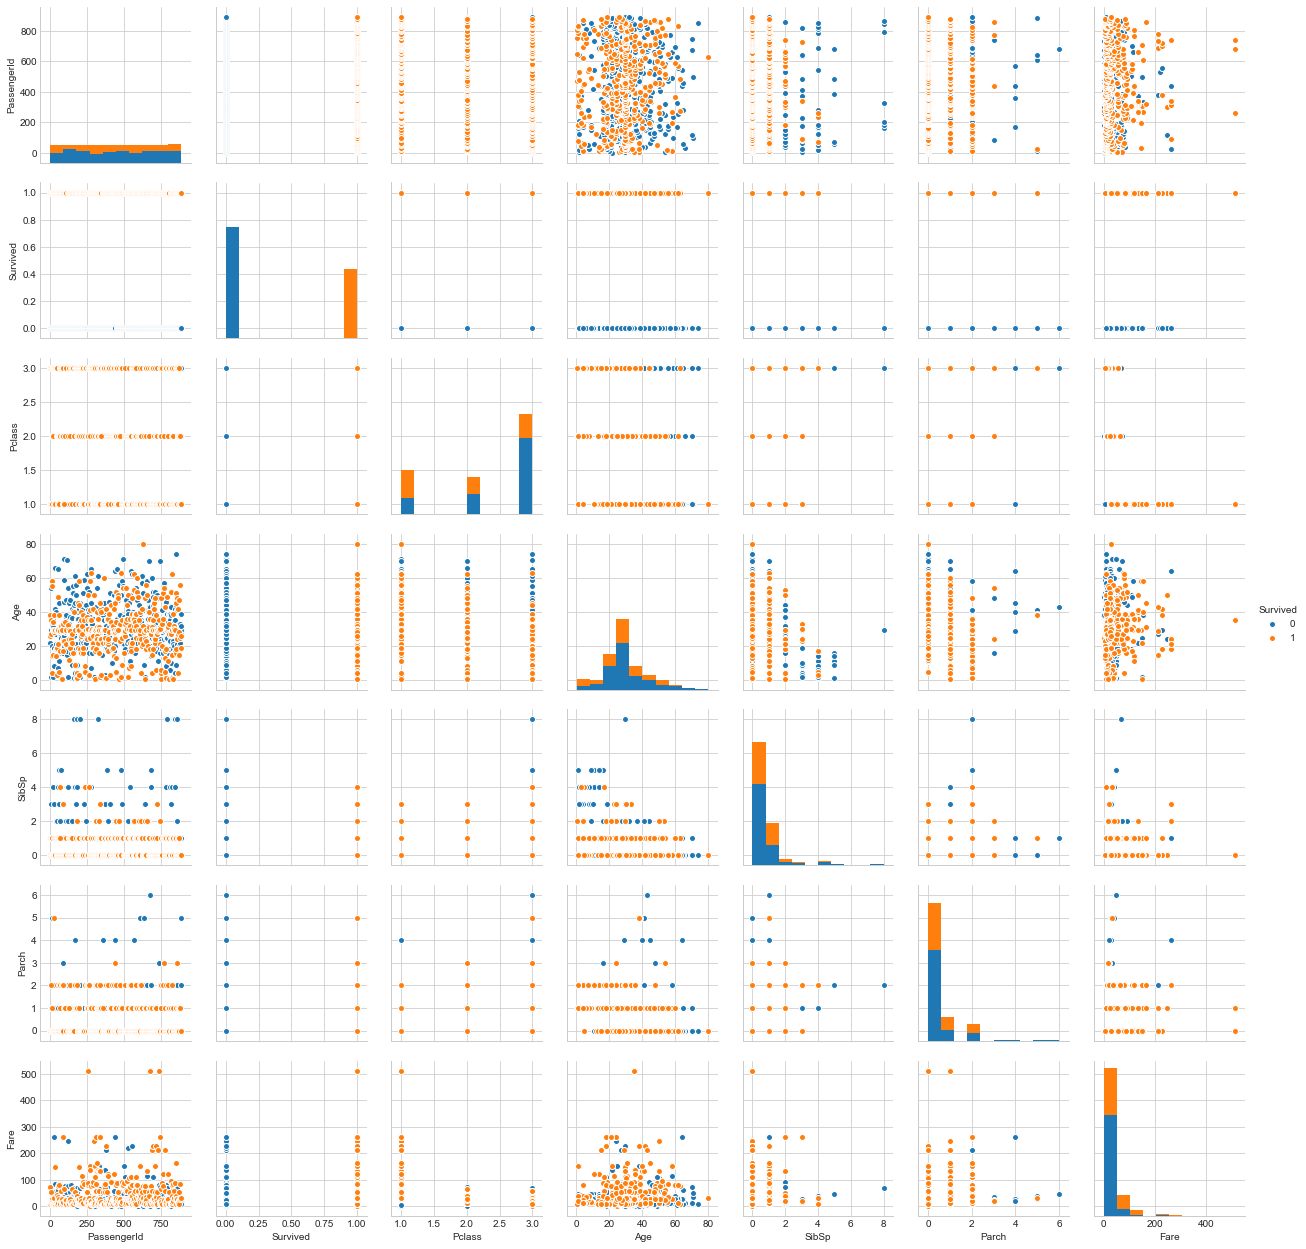

In [324]:
sns.pairplot(data, hue="Survived")

In [325]:
# Converting "Sex" Column in categorical variable
le = LabelEncoder()
data.Sex = le.fit_transform(data["Sex"])

In [326]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500


In [327]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare'],
      dtype='object')

## Feature Selection and Data Splitting

In [328]:
# Selecting features and target variable
X = data.loc[:,['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = data[["Survived"]]

In [329]:
from sklearn.model_selection import train_test_split

In [330]:
# Split data into train and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Training and Predicting

### Classification Algorithms Used:
* Logistic Regression
* Decision Tree Classifier
* Random Forest Classifier
* Naive Bayes
* Support Vector Machine
* K Nearest Neighbors

## Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression

In [224]:
model1 = LogisticRegression()

In [225]:
model1.fit(X_train, y_train)

C:\Users\Mayank Aggarwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [226]:
predict = model1.predict(X_test)

In [234]:
print((model1.score(X_test, y_test)*100), "%")

81.35593220338984 %


In [228]:
print(predict[:10])
# impor
print(y_test[:10])

[0 0 0 1 1 1 1 0 1 1]
     Survived
709         1
439         0
840         0
720         1
39          1
290         1
300         1
333         0
208         1
136         1


In [331]:
# Importing evaluation Metrics
from sklearn.metrics import classification_report, f1_score, confusion_matrix, log_loss,jaccard_similarity_score, accuracy_score

### Evaluation Metrics

In [230]:
print("Classification Report")
print(classification_report(y_test, predict))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict))
print("F1- Score")
print(f1_score(y_test, predict))
print("Log Loss")
print(log_loss(y_test, predict))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict))
print("Accuracy Score")
print(accuracy_score(y_test, predict))

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.90      0.85       175
          1       0.82      0.69      0.75       120

avg / total       0.81      0.81      0.81       295

Confusion Matrix
[[157  18]
 [ 37  83]]
F1- Score
0.751131221719457
Log Loss
6.439481676182479
Jaccard Similarity Index
0.8135593220338984
Accuracy Score
0.8135593220338984


## Decision Tree Classifier

In [332]:
from sklearn.tree import DecisionTreeClassifier

In [333]:
model2 = DecisionTreeClassifier()

In [334]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [335]:
predict2 = model2.predict(X_test)

In [336]:
model2.score(X_test, y_test)

0.7627118644067796

### Evaluation Metrics

In [337]:
print("Classification Report")
print(classification_report(y_test, predict2))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict2))
print("F1- Score")
print(f1_score(y_test, predict2))
print("Log Loss")
print(log_loss(y_test, predict2))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict2))
print("Accuracy Score")
print(accuracy_score(y_test, predict2))

Classification Report
             precision    recall  f1-score   support

          0       0.79      0.82      0.80       175
          1       0.72      0.68      0.70       120

avg / total       0.76      0.76      0.76       295

Confusion Matrix
[[143  32]
 [ 38  82]]
F1- Score
0.7008547008547009
Log Loss
8.19572859241191
Jaccard Similarity Index
0.7627118644067796
Accuracy Score
0.7627118644067796


## Support Vector Machine

In [240]:
from sklearn.svm import SVC

In [241]:
model3 = SVC()

In [242]:
model3.fit(X_train, y_train)

C:\Users\Mayank Aggarwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [243]:
predict3 = model3.predict(X_test)

In [245]:
model3.score(X_test, y_test)

0.8203389830508474

### Evaluation Metrics

In [338]:
print("Classification Report")
print(classification_report(y_test, predict3))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict3))
print("F1- Score")
print(f1_score(y_test, predict3))
print("Log Loss")
print(log_loss(y_test, predict3))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict3))
print("Accuracy Score")
print(accuracy_score(y_test, predict3))

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.91      0.86       175
          1       0.84      0.69      0.76       120

avg / total       0.82      0.82      0.82       295

Confusion Matrix
[[159  16]
 [ 37  83]]
F1- Score
0.7579908675799086
Log Loss
6.205315059285253
Jaccard Similarity Index
0.8203389830508474
Accuracy Score
0.8203389830508474


## Random Forest Classifier

In [247]:
from sklearn.ensemble import RandomForestClassifier

In [248]:
model4 = RandomForestClassifier()

In [249]:
model4.fit(X_train, y_train)

C:\Users\Mayank Aggarwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [250]:
predict4 = model4.predict(X_test)

In [252]:
model4.score(X_test, y_test)

0.8135593220338984

### Evaluation Metrics

In [253]:
print("Classification Report")
print(classification_report(y_test, predict4))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict4))
print("F1- Score")
print(f1_score(y_test, predict4))
print("Log Loss")
print(log_loss(y_test, predict4))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict4))
print("Accuracy Score")
print(accuracy_score(y_test, predict4))

Classification Report
             precision    recall  f1-score   support

          0       0.84      0.85      0.84       175
          1       0.78      0.76      0.77       120

avg / total       0.81      0.81      0.81       295

Confusion Matrix
[[149  26]
 [ 29  91]]
F1- Score
0.7679324894514769
Log Loss
6.439503360180585
Jaccard Similarity Index
0.8135593220338984
Accuracy Score
0.8135593220338984


## Naive Bayes

In [254]:
from sklearn.naive_bayes import GaussianNB

In [255]:
model5 = GaussianNB()

In [256]:
model5.fit(X_train, y_train)

C:\Users\Mayank Aggarwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [257]:
predict5 = model5.predict(X_test)

In [258]:
model5.score(X_test, y_test)

0.7864406779661017

### Evaluation Metrics

In [339]:
print("Classification Report")
print(classification_report(y_test, predict5))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict5))
print("F1- Score")
print(f1_score(y_test, predict5))
print("Log Loss")
print(log_loss(y_test, predict5))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict5))
print("Accuracy Score")
print(accuracy_score(y_test, predict5))

Classification Report
             precision    recall  f1-score   support

          0       0.85      0.77      0.81       175
          1       0.71      0.81      0.75       120

avg / total       0.79      0.79      0.79       295

Confusion Matrix
[[135  40]
 [ 23  97]]
F1- Score
0.754863813229572
Log Loss
7.376186090768071
Jaccard Similarity Index
0.7864406779661017
Accuracy Score
0.7864406779661017


## K Nearest Neighbors

In [340]:
from sklearn.neighbors import KNeighborsClassifier

In [341]:
model6 = KNeighborsClassifier(4)

In [342]:
model6.fit(X_train, y_train)

C:\Users\Mayank Aggarwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [343]:
predict6 = model6.predict(X_test)

In [344]:
model6.score(X_test, y_test)

0.7423728813559322

### Evaluation Metrics

In [345]:
print("Classification Report")
print(classification_report(y_test, predict6))
print("Confusion Matrix")
print(confusion_matrix(y_test, predict6))
print("F1- Score")
print(f1_score(y_test, predict6))
print("Log Loss")
print(log_loss(y_test, predict6))
print("Jaccard Similarity Index")
print(jaccard_similarity_score(y_test, predict6))
print("Accuracy Score")
print(accuracy_score(y_test, predict6))

Classification Report
             precision    recall  f1-score   support

          0       0.72      0.92      0.81       175
          1       0.81      0.48      0.60       120

avg / total       0.76      0.74      0.73       295

Confusion Matrix
[[161  14]
 [ 62  58]]
F1- Score
0.6041666666666667
Log Loss
8.89816339110927
Jaccard Similarity Index
0.7423728813559322
Accuracy Score
0.7423728813559322


## Classifiers Comparison

C:\Users\Mayank Aggarwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mayank Aggarwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\Mayank Aggarwal\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mayank Aggarwal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

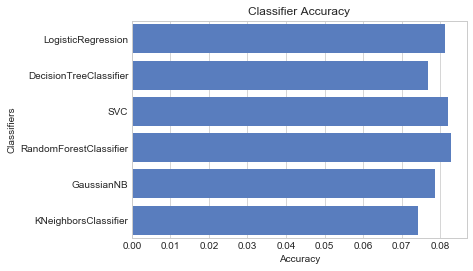

In [290]:
classifiers = [model1, model2, model3, model4, model5, model6]
result_col = ["Classifiers", "Accuracy"]
result = pd.DataFrame(columns=result_col)
acc_dict = {}
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = accuracy_score(y_test,predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc
        
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    result_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=result_col)
    result = result.append(result_entry)
    
    
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifiers', data=result, color="b")

In [291]:
result

,Classifiers,Accuracy
0,LogisticRegression,0.081356
0,DecisionTreeClassifier,0.076949
0,SVC,0.082034
0,RandomForestClassifier,0.082712
0,GaussianNB,0.078644
0,KNeighborsClassifier,0.074237


#### Hence Best classifier among above classifiers for this problem is Random forest Classifier

--------------------------------------------------------------------------------------------------------------------------------